# California Public Schools: Meeting ELA Standards
#### Project Description
####

In [17]:
# Import Libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings; warnings.simplefilter('ignore')

## Import Dataset

In [18]:
df = pd.read_csv('data/California_School_District_Areas_2018-19.csv')
pd.set_option('display.max_columns', None)
df.drop(columns=['OBJECTID', 'FedID', 'CDCode', 'CDSCode'], inplace=True)
df.shape

(944, 65)

In [19]:
df.head()

,Year,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,UpdateNotes,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area
0,2018-19,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07
1,2018-19,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06
2,2018-19,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07
3,2018-19,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08
4,2018-19,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06


## Clean Dataset

In [20]:
# renaming the columns
df = df.rename(columns=
           {'DistrictName': 'SchoolName',
            'DistrictType': 'SchoolType',
            'AAcount': 'AfricanAmerican',
            'AApct': 'AfricanAmericanPct',
            'AIcount': 'AmericanIndian',
            'AIpct': 'AmericanIndianPct',
            'AScount': 'Asian',
            'ASpct': 'AsianPct',
            'FIcount': 'Filipino',
            'FIpct': 'FilipinoPct',
            'HIcount': 'Hispanic',
            'HIpct': 'HispanicPct',
            'MRcount': 'MultipleRace',
            'MRpct': 'MulitpleRacePct',
            'PIcount': 'PacificIslander',
            'PIpct': 'PacificIslanderPct',
            'WHcount': 'White',
            'WHpct': 'WhitePct',
            'NRcount': 'RaceNotReported',
            'NRpct': 'RaceNotReportedPct',
            'ELcount': 'EnglishLearner',
            'ELpct': 'EnglishLearnerPct',
            'FOScount': 'Foster',
            'FOSpct': 'FosterPct',
            'HOMcount': 'Homeless',
            'HOMpct': 'HomelessPct',
            'MIGcount': 'Migrant',
            'MIGpct': 'MigrantPct',
            'SWDcount': 'Disability',
            'SWDpct': 'DisabilityPct',
            'SEDcount': 'SocioEconDisadvantage',
            'SEDpct': 'SocioEconDisadvantagePct',
            'UPcount': 'Unduplicated',
            'UPpct': 'UnduplicatedPct'
            },
              inplace=False)

In [21]:
# df['MathStdMetPct'].describe()
# df['ELAStdMetPct'].describe()
# df['StudentPerformancePercent'] = ((df['MathTested'] + df['ELATested']) / 2) / df['EnrollTotal']

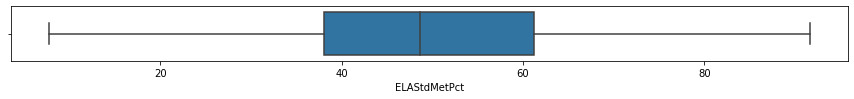

In [22]:
# target variable
plt.figure(figsize=(15,1))
sns.boxplot(data=df, x='ELAStdMetPct');

#### Null Values

In [23]:
# df.info()

In [24]:
## How do we want to handle null values
df['CCPrepCohortCount'] = df['CCPrepCohortCount'].replace(np.NaN, 0)

#### Outliers

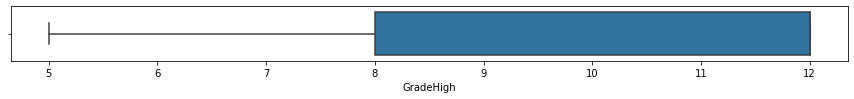

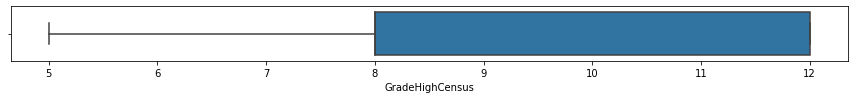

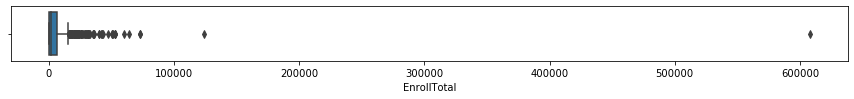

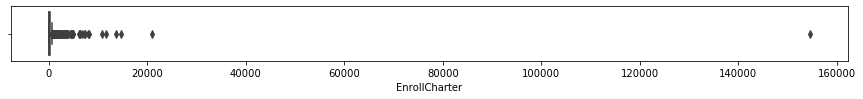

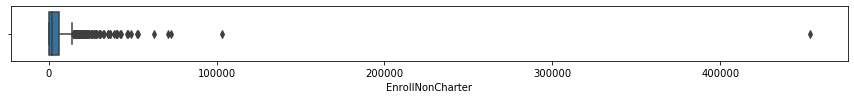

In [ ]:
columns = list(df.columns)
columns.remove('CountyName')
columns.remove('Year') 
columns.remove('SchoolName')
columns.remove('SchoolType')
columns.remove('GradeLow')
columns.remove('GradeLowCensus')
columns.remove('AssistStatus')
columns.remove('CongressUS')
columns.remove('SenateCA')
columns.remove('AssemblyCA')
columns.remove('LocaleDistrict')
columns.remove('UpdateNotes')

for item in columns:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=item);

## EDA

In [ ]:
# df.describe()

In [ ]:
# df.corr()

In [ ]:
# df.hist(bins=10, figsize=(25,25))
# plt.show()

In [ ]:
# top 15 schools counties
y = df.groupby('CountyName')['ELAStdMetPct'].mean().sort_values(ascending=False).head(15)
x = y.index

plt.title('Top 15 ELA Average Percentages, By County',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('County', fontsize=14);

plt.barh(x,y, color='cornflowerblue');
plt.gca().invert_yaxis()